# Векторный потенциал электростатического поля точечного заряда

$\vec{E} = \frac{q}{r^2}\frac{\vec{r}}{r} = \frac{q}{r^3}\vec{r}$

$\vec{r}=\left(\begin{array}{c}
    x \\
    y \\
    z \\
\end{array}\right)$

$r^3 = \left(x^2+y^2+z^2\right)^{\frac{3}{2}}$

$\vec{E}=\left(\begin{array}{c}
    E_x \\
    E_y \\
    E_z \\
\end{array}\right)=\left(\begin{array}{c}
    \frac{x}{\left(x^2+y^2+z^2\right)^{\frac{3}{2}}} \\
    \frac{y}{\left(x^2+y^2+z^2\right)^{\frac{3}{2}}} \\
    \frac{z}{\left(x^2+y^2+z^2\right)^{\frac{3}{2}}} \\
\end{array}\right)$

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

In [2]:
Eu.<x,y,z> = EuclideanSpace()

In [3]:
x0, y0, z0 = var("x_0, y_0, z_0")
assume(x0, "real")
assume(y0, "real")
assume(z0, "real")

q = var("q")

In [4]:
x0 = 0
y0 = 0
z0 = 0

In [5]:
q = 1

In [6]:
r = Eu.vector_field(x, y, z, name='r')
r.display()

r = x e_x + y e_y + z e_z

In [7]:
r.norm().display()

|r|: E^3 → ℝ
   (x, y, z) ↦ sqrt(x^2 + y^2 + z^2)

In [8]:
E = q * r / (r.norm())^3

In [9]:
E.display()

x/(x^2 + y^2 + z^2)^(3/2) e_x + y/(x^2 + y^2 + z^2)^(3/2) e_y + z/(x^2 + y^2 + z^2)^(3/2) e_z

In [10]:
disp(E.display())

<IPython.core.display.Math object>

Покажем, что $\vec{E} = rot\vec{A}$, то есть существует $\vec{A}=\left(\begin{array}{c}
    A_x (x,y,z) \\
    A_y (x,y,z)\\
    A_z (x,y,z)\\
\end{array}\right)$ для которого

$$\vec{E}=\left(\begin{array}{c}
    E_x \\
    E_y \\
    E_z \\
\end{array}\right)=\left[\begin{array}{ccc}
    \vec{i} & \vec{j} & \vec{k}\\
    \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z}\\
    A_{x} & A_{y} & A_{z}\\
\end{array}\right] = \left(\begin{array}{c}
    \frac{\partial A_z}{\partial y} - \frac{\partial A_y}{\partial z} \\
    \frac{\partial A_x}{\partial z} - \frac{\partial A_z}{\partial x} \\
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} \\
\end{array}\right)$$

Нужно указать хотя бы одно решение. Будем искать $\vec{A}\left(\vec{r}\right)$, полагая $A_z = 0$

$$\vec{E}=\left(\begin{array}{c}
    E_x \\
    E_y \\
    E_z \\
\end{array}\right) = \left(\begin{array}{c}
    - \frac{\partial A_y}{\partial z} \\
    \frac{\partial A_x}{\partial z} \\
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} \\
\end{array}\right)$$

$$\left(\begin{array}{c}
    A_y = - \int\limits_{z_0}^{z} E_x (x,y,z) dz + \psi(x,y) \\
    A_x = \int\limits_{z_0}^{z} E_y (x,y,z) dz + \varphi(x,y)\\
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} = E_z \\
\end{array}\right)$$

Подставляя $A_y$ и $A_x$ в третье соотношение

$$E_z = \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y}
= \frac{\partial }{\partial x} \left(- \int\limits_{z_0}^{z} E_x (x,y,z) dz + \psi(x,y)\right)
- \frac{\partial }{\partial y} \left( \int\limits_{z_0}^{z} E_y (x,y,z) dz + \varphi(x,y) \right)$$

$$E_z
= - \int\limits_{z_0}^{z} \frac{\partial E_x}{\partial x} dz + \frac{\partial \psi(x,y)}{\partial x} 
- \int\limits_{z_0}^{z} \frac{\partial E_y}{\partial y} dz - \frac{\partial \varphi(x,y)}{\partial y}$$

Учтём, что 

$$-\int\limits_{z_0}^{z} \left(\frac{\partial E_x}{\partial x} + 
\frac{\partial E_y}{\partial y} \right)\,dz =
-\int\limits_{z_0}^{z} \left(
\frac{\partial E_x}{\partial x} + 
\frac{\partial E_y}{\partial y} +
\frac{\partial E_z}{\partial z}
\right)\,dz 
+\int\limits_{z_0}^{z} \left(
\frac{\partial E_z}{\partial z}
\right)\,dz =
E_z(x,y,z) - E_z(x,y,z_0)
$$

Тогда

$$\frac{\partial \psi(x,y)}{\partial x} 
- \frac{\partial \varphi(x,y)}{\partial y} = E_z(x,y,z_0)$$

$$\vec{A}=\left(\begin{array}{c}
    A_x \\
    A_y \\
    A_z \\
\end{array}\right)=\left(\begin{array}{c}
    \int\limits_{z_0}^{z} E_y (x,y,z) dz + \varphi(x,y)\\
    - \int\limits_{z_0}^{z} E_x (x,y,z) dz + \psi(x,y) \\
    0 \\
\end{array}\right)$$

Полагая $\varphi(x,y) = 0$

$$\psi(x,y) = \int\limits_{x_0}^{x} E_z(x,y,z_0)\,dx$$

получаем

$$\vec{A}=\left(\begin{array}{c}
    A_x \\
    A_y \\
    A_z \\
\end{array}\right)=\left(\begin{array}{c}
    \int\limits_{z_0}^{z}E_y(x,y,z)\, dz \\
    \int\limits_{x_0}^{x}E_z(x,y,z_0)\, dx - \int\limits_{z_0}^{z}E_x(x,y,z)\, dz \\
    0 \\
\end{array}\right)$$

In [11]:
def recoverA(E, defint):
    Ex = E[1].expr()
    Ey = E[2].expr()
    Ez = E[3].expr()
    
    assume(z>0)
    assume(y>0)
    assume(x>0)
    
    if defint:
        Ax = Ey.integrate(z, z0, z)
        Ay = Ez.integrate(x, x0, x).subs(z == z0) - Ex.integrate(z, z0, z)
        Az = 0
    else:
        Ax = Ey.integrate(z)
        Ay = Ez.integrate(x).subs(z == z0) - Ex.integrate(z)
        Az = 0

    return Ax, Ay, Az

In [12]:
Ax, Ay, Az = recoverA(E, defint = True)

In [13]:
Ax, Ay, Az = recoverA(E, defint = False)

Таким образом векторный потенциал электростатического поля точечного заряда

In [14]:
disp(Ax)
disp(Ay)
disp(Az)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
A = Eu.vector_field(Ax, Ay, Az, name='A')
disp(A.display())

<IPython.core.display.Math object>

Проверяем, что $rot\vec{A} = \vec{E}$

In [16]:
from sage.manifolds.operators import *

In [17]:
curlA = curl(A)

In [18]:
disp(curlA.display())

<IPython.core.display.Math object>

In [19]:
disp((curlA-E).display())

<IPython.core.display.Math object>

In [20]:
curlAx = curlA[1].expr()
curlAy = curlA[2].expr()
curlAz = curlA[3].expr()

In [21]:
disp(curlAz.numerator().factor())

<IPython.core.display.Math object>

In [22]:
disp(curlAz.denominator().factor())

<IPython.core.display.Math object>

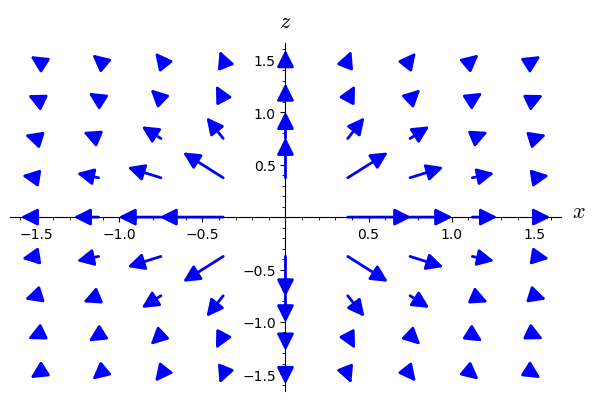

In [23]:
E.plot(fixed_coords={y: 0.5}, ambient_coords=(x,z), max_range=1.5,
       scale=0.25)

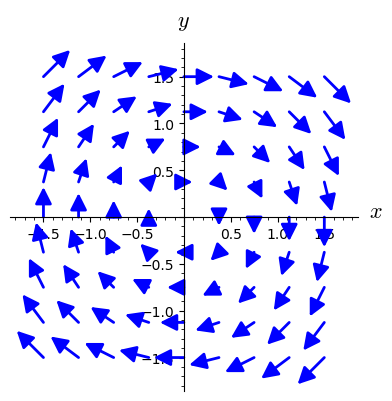

In [24]:
(A*(x^2+y^2)).plot(fixed_coords={z: 2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

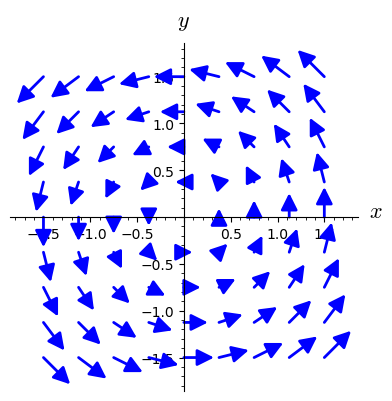

In [25]:
(A*(x^2+y^2)).plot(fixed_coords={z: -2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

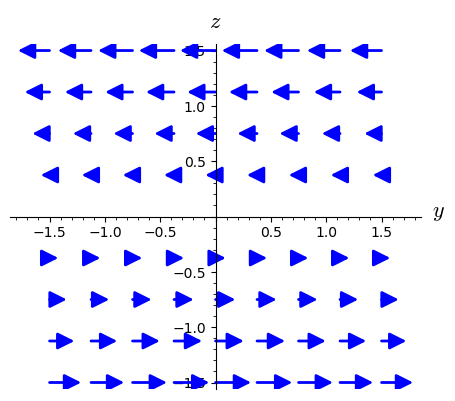

In [26]:
(A*(x^2+y^2)).plot(fixed_coords={x: 2.5}, ambient_coords=(y,z), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

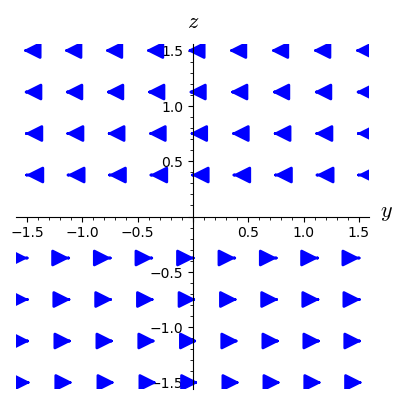

In [27]:
A.plot(fixed_coords={x: 2.5}, ambient_coords=(y,z), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

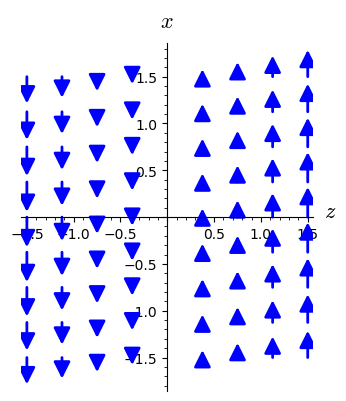

In [28]:
(A*(x^2+y^2)).plot(fixed_coords={y: 2.5}, ambient_coords=(z,x), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

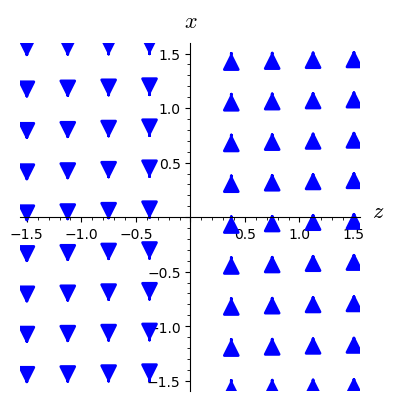

In [29]:
(A).plot(fixed_coords={y: 2.5}, ambient_coords=(z,x), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

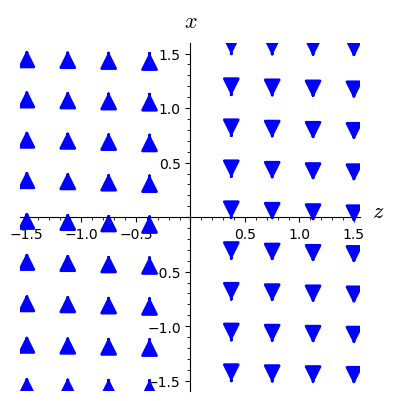

In [30]:
(A).plot(fixed_coords={y: -2.5}, ambient_coords=(z,x), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

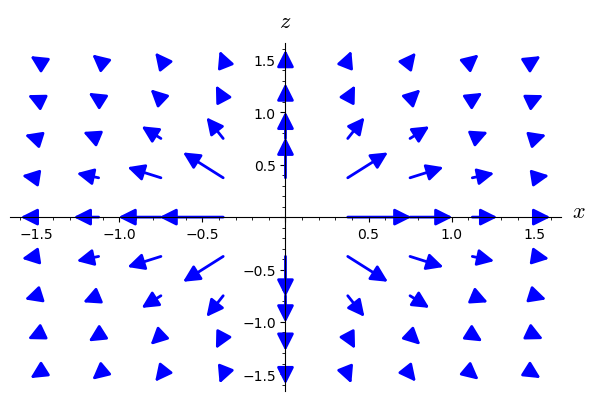

In [31]:
curlA.plot(fixed_coords={y: 0.5}, ambient_coords=(x,z), max_range=1.5,
       scale=0.25)

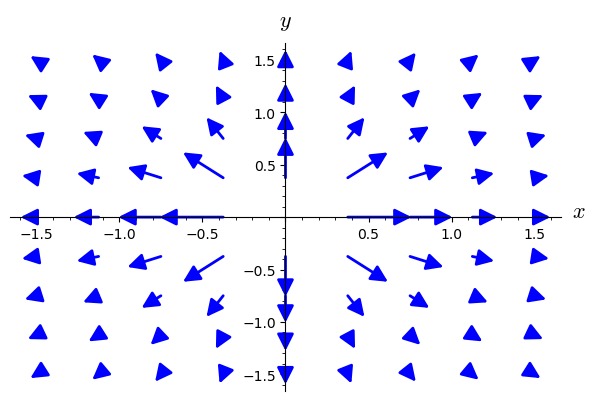

In [32]:
curlA.plot(fixed_coords={z: 0.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25)

In [33]:
div(A).display()

div(A): E^3 → ℝ
   (x, y, z) ↦ 0

In [34]:
AAx, AAy, AAz = recoverA(A, defint = False)

In [35]:
disp(AAx)
disp(AAy)
disp(AAz)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
AA = Eu.vector_field(AAx, AAy, AAz, name='AA')
AA.display()

AA = -sqrt(x^2 + y^2 + z^2)*x/(x^2 + y^2) e_x - sqrt(x^2 + y^2 + z^2)*y/(x^2 + y^2) e_y

In [37]:
div(AA).display()

div(AA): E^3 → ℝ
   (x, y, z) ↦ -1/sqrt(x^2 + y^2 + z^2)

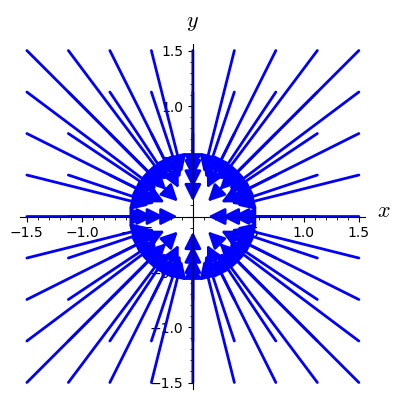

In [38]:
(AA*(x^2+y^2)).plot(fixed_coords={z: 2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

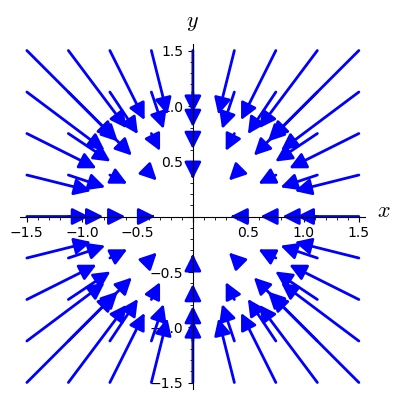

In [39]:
(AA*(x^2+y^2)).plot(fixed_coords={z: 0}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

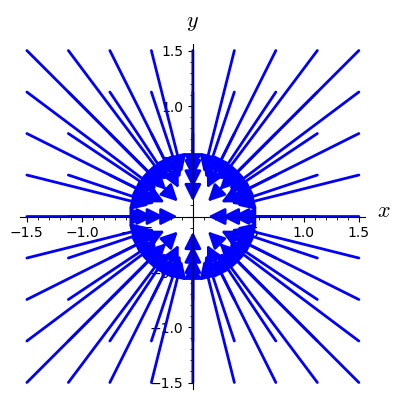

In [40]:
(AA*(x^2+y^2)).plot(fixed_coords={z: -2.5}, ambient_coords=(x,y), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

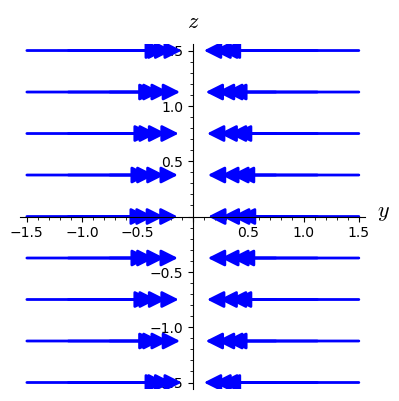

In [41]:
(AA*(x^2+y^2)).plot(fixed_coords={x: -2.5}, ambient_coords=(y,z), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

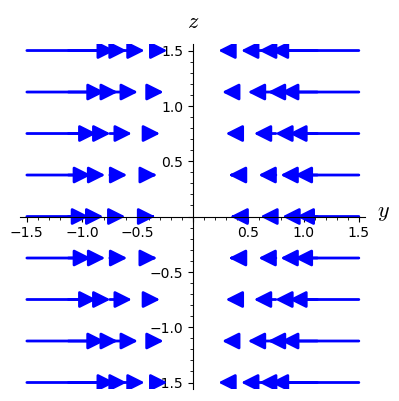

In [42]:
(AA*(x^2+y^2)).plot(fixed_coords={x: 0}, ambient_coords=(y,z), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

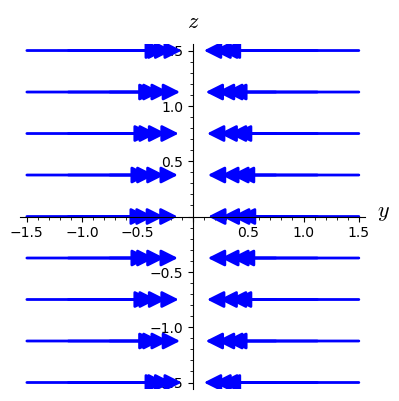

In [43]:
(AA*(x^2+y^2)).plot(fixed_coords={x: 2.5}, ambient_coords=(y,z), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

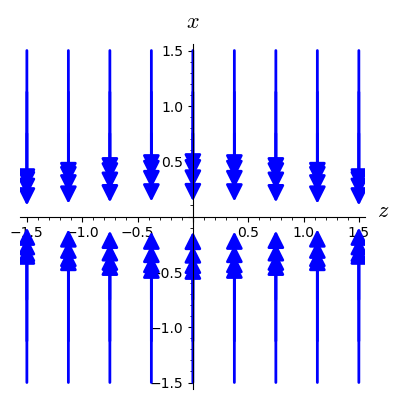

In [44]:
(AA*(x^2+y^2)).plot(fixed_coords={y: -2.5}, ambient_coords=(z,x), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

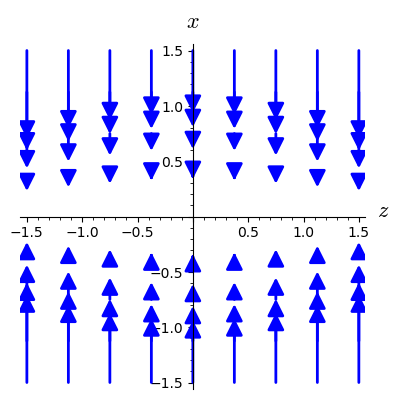

In [45]:
(AA*(x^2+y^2)).plot(fixed_coords={y: 0}, ambient_coords=(z,x), max_range=1.5,
       scale=0.25, aspect_ratio = 1)

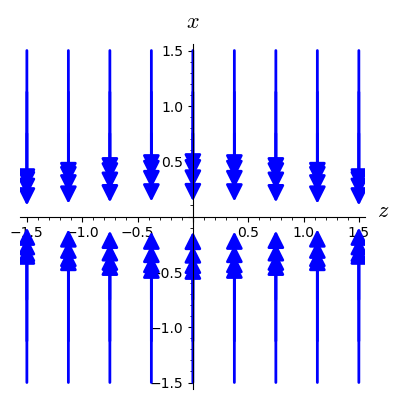

In [46]:
(AA*(x^2+y^2)).plot(fixed_coords={y: 2.5}, ambient_coords=(z,x), max_range=1.5,
       scale=0.25, aspect_ratio = 1)